# Bandit Problem

In [5]:
# imports
from bandits import Bandit
import random
import numpy as np
import matplotlib.pyplot as plt
from math import log,sqrt
# Include your imports here, if any are used. 

A bandit is one option (or “arm”) you can choose, where the reward you get is uncertain and must be learned by trying it out.
In multi-armed bandits, you repeatedly pick among several such uncertain options to find which one pays best.

A list of ten bandit objects initialized in the list...

In [6]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

To generate reward from that bandit, use the pullLever() command

In [7]:
bandits[0].pullLever()

1.7202537620726126

## Greedy algorithm Implementation

In [8]:
def run_greedy():
    # TODO: Implement the greedy algorithm here
    # Return the reward from the bandits in a list
    Q=np.array([0.0]*10)
    N=np.array([0]*10)
    rewards=[]
    for _ in range(1000):
        maxval=Q.max()
        maxindices=np.where(Q==maxval)[0]
        index=np.random.choice(maxindices)
        R=bandits[index].pullLever()
        N[index]+=1
        Q[index]+=(R-Q[index])/N[index]
        rewards.append(R)
    return rewards

Plot the cumulative average of rewards as the number of iterations increases. and display that image below.

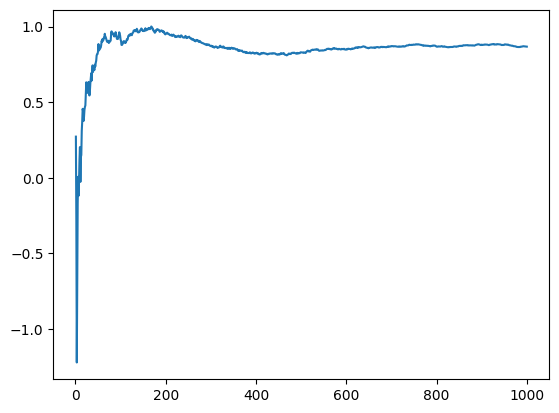

In [11]:
rew=run_greedy()
y=[0]*1000
x=[1]*1000
y[0]=rew[0]
for i in range(1,1000):
    x[i]=i+1
    y[i]=y[i-1] + (rew[i]-y[i-1])/(i+1)
plt.plot(x,y)

## $\epsilon$-greedy Algorithm

In [12]:
def run_epsilon_greedy(epsilon):
    # TODO: Implement the epsilon greedy algorithm here
    # Return the reward from the bandits in a list
    Q=np.array([0.0]*10)
    N=np.array([0]*10)
    rewards=[]
    for _ in range(1000):
        c=random.random()
        if c>=epsilon:
            maxval=Q.max()
            maxindices=np.where(Q==maxval)[0]
            index=np.random.choice(maxindices)
            R=bandits[index].pullLever()
            N[index]+=1
            Q[index]+=(R-Q[index])/N[index]
            rewards.append(R)
        else:
            choice=random.randint(0,9)
            R=bandits[choice].pullLever()
            N[choice]+=1
            Q[choice]+=(R-Q[choice])/N[choice]
            rewards.append(R)
    return rewards

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

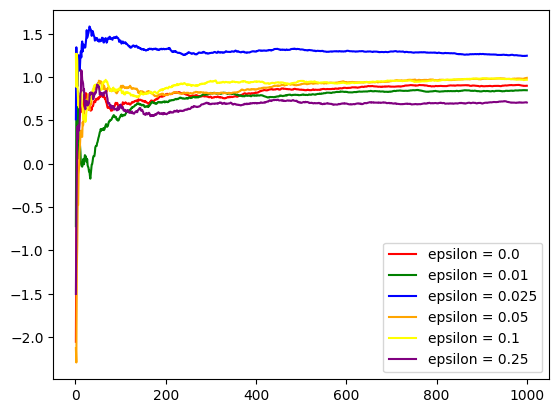

In [139]:
epsilons=[0.0,0.01,0.025,0.05,0.1,0.25]
colours=['red','green','blue','orange','yellow','purple']
for j in range(6):
    rew=run_epsilon_greedy(epsilons[j])
    y=[0]*1000
    x=[1]*1000
    y[0]=rew[0]
    for i in range(1,1000):
        x[i]=i+1
        y[i]=y[i-1] + (rew[i]-y[i-1])/(i+1)
    plt.plot(x,y,color=colours[j],label=f"epsilon = {epsilons[j]}")
plt.legend()
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

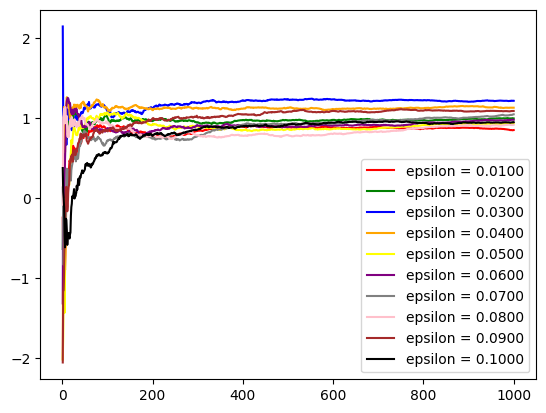

In [137]:
epsilons=np.linspace(0.01,0.1,10)
colours=['red','green','blue','orange','yellow','purple','gray','pink','brown','black']
for j in range(10):
    rew=run_epsilon_greedy(epsilons[j])
    y=[0]*1000
    x=[1]*1000
    y[0]=rew[0]
    for i in range(1,1000):
        x[i]=i+1
        y[i]=y[i-1] + (rew[i]-y[i-1])/(i+1)
    plt.plot(x,y,color=colours[j],label=f"epsilon = {epsilons[j]:.4f}")
plt.legend()
plt.show()

#there is a lot of variation however blue, i.e. epsilon=0.03 seems like it may be the optimal epsilon value

## Optimistic Initial Values

In [21]:
def run_optimistic_greedy():
    # TODO: Implement the optimistic greedy algorithm here

    # Return the reward from the bandits in a list
    Q=np.array([10.0]*10)
    N=np.array([0]*10)
    rewards=[]
    for _ in range(1000):
        maxval=Q.max()
        maxindices=np.where(Q==maxval)[0]
        index=np.random.choice(maxindices)
        R=bandits[index].pullLever()
        N[index]+=1
        Q[index]+=(R-Q[index])/N[index]
        rewards.append(R)
    return rewards

Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$ and try to compare which is better.

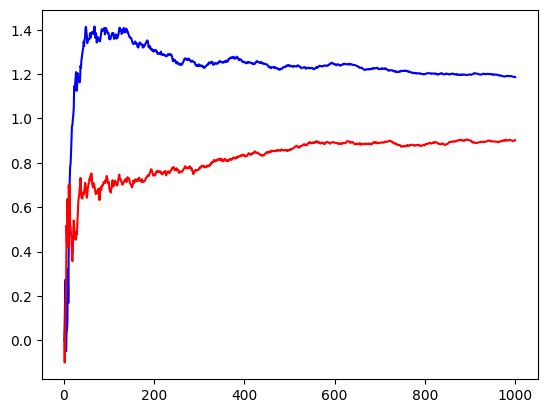

In [134]:
rew1=run_optimistic_greedy()
rew2=run_epsilon_greedy(0.1)
y1=[0]*1000
y2=[0]*1000
x=[1]*1000
y[0]=rew[0]
for i in range(1,1000):
    x[i]=i+1
    y1[i]=y1[i-1] + (rew1[i]-y1[i-1])/(i+1)
    y2[i]=y2[i-1] + (rew2[i]-y2[i-1])/(i+1)
plt.plot(x,y1,color='blue')
plt.plot(x,y2,color='red')

## Upper Confidence Bound (UCB)

In [41]:
def run_ucb(c):
    # TODO: Implement the UCB algorithm here
    # Return the reward from the bandits in a list
    Q=np.array([0.0]*10)
    N=np.array([0]*10)
    rewards=[]
    for t in range(1000):
        if np.any(N==0):
            indices=np.where(N==0)[0]
            index=np.random.choice(indices)
            R=bandits[index].pullLever()
            N[index]+=1
            Q[index]+=(R-Q[index])/N[index]
            rewards.append(R)
            continue
        ucblist=[(Q[v]+c*sqrt(log(t)/N[v])) for v in range(10)]
        index=np.argmax(ucblist)
        R=bandits[index].pullLever()
        N[index]+=1
        Q[index]+=(R-Q[index])/N[index]
        rewards.append(R)
    return rewards

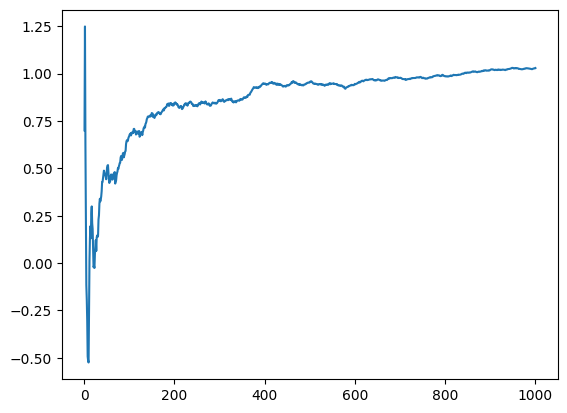

In [64]:
rew=run_ucb(2)
x=[1]*1000
y[0]=rew[0]
for i in range(1,1000):
    x[i]=i+1
    y[i]=y[i-1] + (rew[i]-y[i-1])/(i+1)
plt.plot(x,y)